## Regressione Lineare Polinomiale

Creare il set di dati. In questo caso, sia X che y devono essere vettori colonna, cosa che garantiamo utilizzando la funzione "reshape". I due parametri significano: "1": rimodella in 1 colonna, "-1" utilizza tutte le righe richieste in modo tale da preservare il numero totale di elementi nella matrice dopo il rimodellamento.

In [1]:
import matplotlib.pyplot as plt
import numpy as np


%matplotlib notebook

plt.rcParams['text.usetex'] = True

In [2]:
X = np.array([1.1, 1.4, 2.1, 3.1, 3.7, 4.2]).reshape(-1, 1)
y = np.array([1.2, 1.5, 1.7, 2.1, 2.3, 2.9]).reshape(-1, 1)

n_records = X.shape[0] # numbero di righe = numbero di dati

Successivamente, inizializziamo la "matrice estesa delle features" come matrice di Vandermonde.
La funzione `numpy.vander` richiede che il primo argomento sia un array 1D, cosa che può essere ottenuta utilizzando la funzione `flatten()`. L'impostazione `increasing=True` definisce che gli "1" formano la prima colonna e non la prima riga.

In [3]:
D = 3 # grado del polinomio

X_tilde = np.vander(X.flatten(), N=D + 1, increasing=True)

X_tilde

array([[ 1.   ,  1.1  ,  1.21 ,  1.331],
       [ 1.   ,  1.4  ,  1.96 ,  2.744],
       [ 1.   ,  2.1  ,  4.41 ,  9.261],
       [ 1.   ,  3.1  ,  9.61 , 29.791],
       [ 1.   ,  3.7  , 13.69 , 50.653],
       [ 1.   ,  4.2  , 17.64 , 74.088]])

Successivamente, definiamo alcuni parametri numerici nonché i valori iniziali per il vettore dei pesi.

In [4]:
learning_rate = 0.0005
max_steps = 10000000
tolerance = 5e-7

theta = np.random.normal(loc=0.0, scale=0.1, size=(D+1)).reshape(-1,1)

In [5]:
theta

array([[-0.10141296],
       [-0.11570339],
       [ 0.08207739],
       [ 0.09111009]])

Infine, eseguiamo la minimizzazione della discesa del gradiente in analogia a quanto fatto nelle lezioni precedenti, e confrontiamo con la soluzione analitica.

In [6]:
# Questo ciclo for potrebbe richiedere un po' di tempo!
for step in range(max_steps):
    if step % 20000 == 0: print('.', end='', flush=True)

    residual = y - X_tilde @ theta       # reminder: "@" is the matrix-vector product
    grad_of_loss = - 2 / n_records * X_tilde.T @ residual  
    theta_increment = -learning_rate * grad_of_loss
    theta += theta_increment

    if np.linalg.norm(theta_increment) < tolerance:
        print('\nFINE.\n')
        break
else:
    assert False, "massimo numero di passi raggiunti"

print("|incremento dei pesi|                   =", np.linalg.norm(theta_increment))
print("valore finale della funzione costo      =", (residual.T @ residual / n_records)[0,0])
print("numero di passi effettuati              =", step)
print("pesi ottenuti         :", theta.flatten())
print("soluzione analitica   :", (np.linalg.inv(X_tilde.T @ X_tilde) @ X_tilde.T @ y).flatten())

......................................................................................
FINE.

|incremento dei pesi|                   = 4.999995898513533e-07
valore finale della funzione costo      = 0.002882401712579571
numero di passi effettuati              = 1701106
pesi ottenuti         : [-0.19861268  1.96952456 -0.70613784  0.09787801]
soluzione analitica   : [-0.53150882  2.42437848 -0.88765607  0.11996224]


Come sempre, creiamo una figura e visualizziamo i nostri risultati. Anche il loro confronto con la soluzione in forma chiusa è un buon controllo di integrità.

<IPython.core.display.Javascript object>


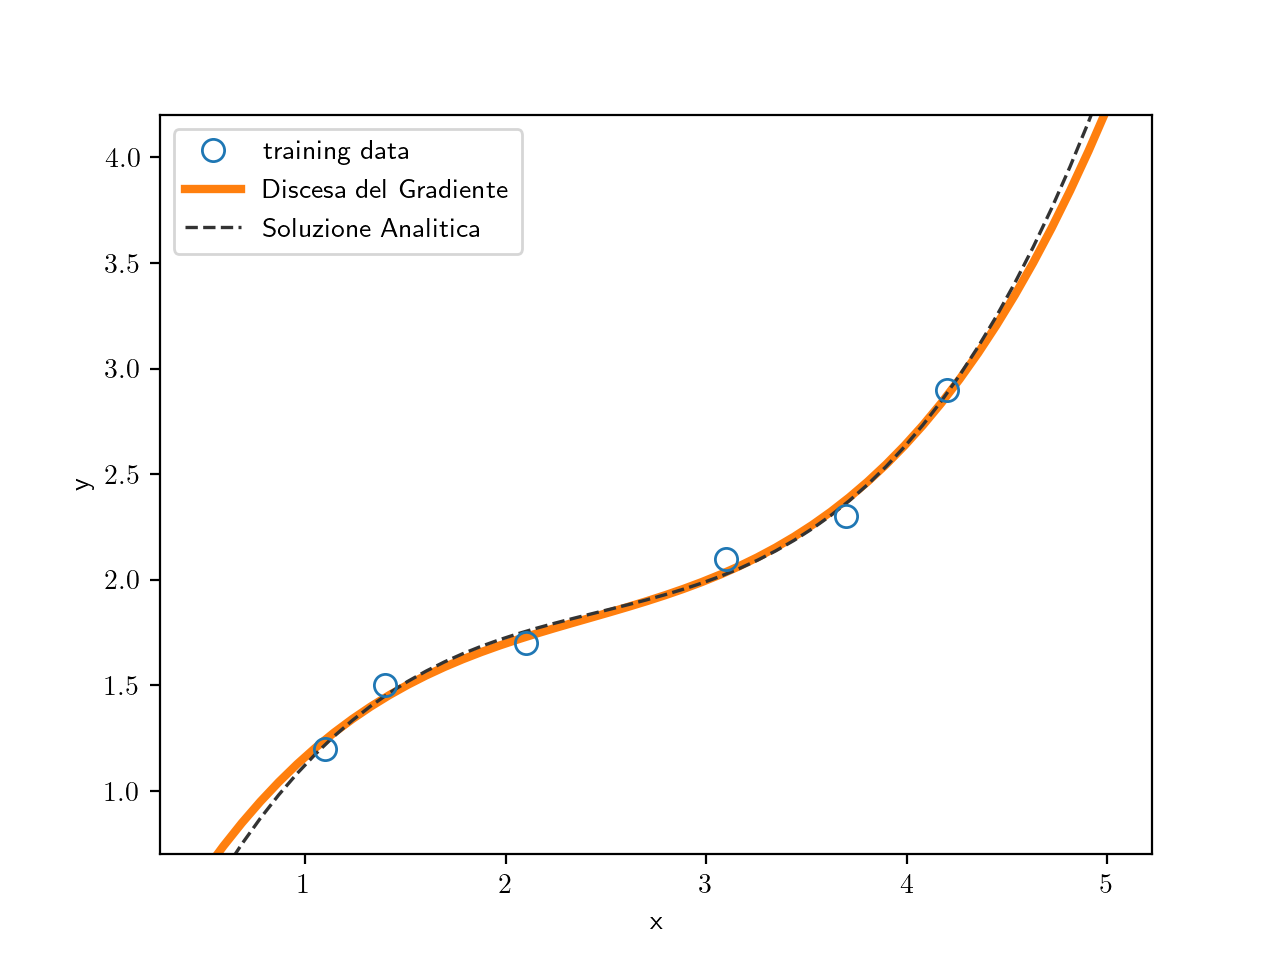

In [7]:
fig, ax = plt.subplots()

ax.plot(X, y, marker='o', lw=0, ms=8, mfc='none', color='C0', label='training data', zorder=99)

# Creiamo dei punti equispaziati sull'asse x
_x = np.linspace(0.5, 5)
# Su quei punti x definiamo la matrice di Vandermonde
_IX = np.vander(_x, N=D + 1, increasing=True)

# Calcoliamo la soluzione analitica per i pesi
analytic_theta = np.linalg.inv(X_tilde.T @ X_tilde) @ X_tilde.T @ y

# Calcoliamo il nostro modello usando i theta dalla discesa del gradiente
ax.plot(_x, (_IX @ theta).flatten(), marker='', c='C1', lw=3, ls='-', label='Discesa del Gradiente')

# Calcoliamo il nostro modello usando i theta dalla soluzione analitica
ax.plot(_x, (_IX @ analytic_theta).flatten(), marker='', c='0.2', lw=1.2, ls='--', label='Soluzione Analitica')

ax.legend()
ax.set(xlabel='x', ylabel='y', ylim=(0.7, 4.2));

### Un esempio un po' più complicato

In [99]:
N = 100

X = 4*np.random.rand(N).reshape(-1, 1) - 2  # numeri random nell'intervallo [-2:2]

eps = np.random.normal(loc=0,scale=1,size=N).reshape(-1, 1)

y = (eps + X - 3.2*X**2 + 0.6*X**3 + 2.54*X**4).reshape(-1, 1)

n_records = X.shape[0] # numbero di righe = numbero di dati

<IPython.core.display.Javascript object>


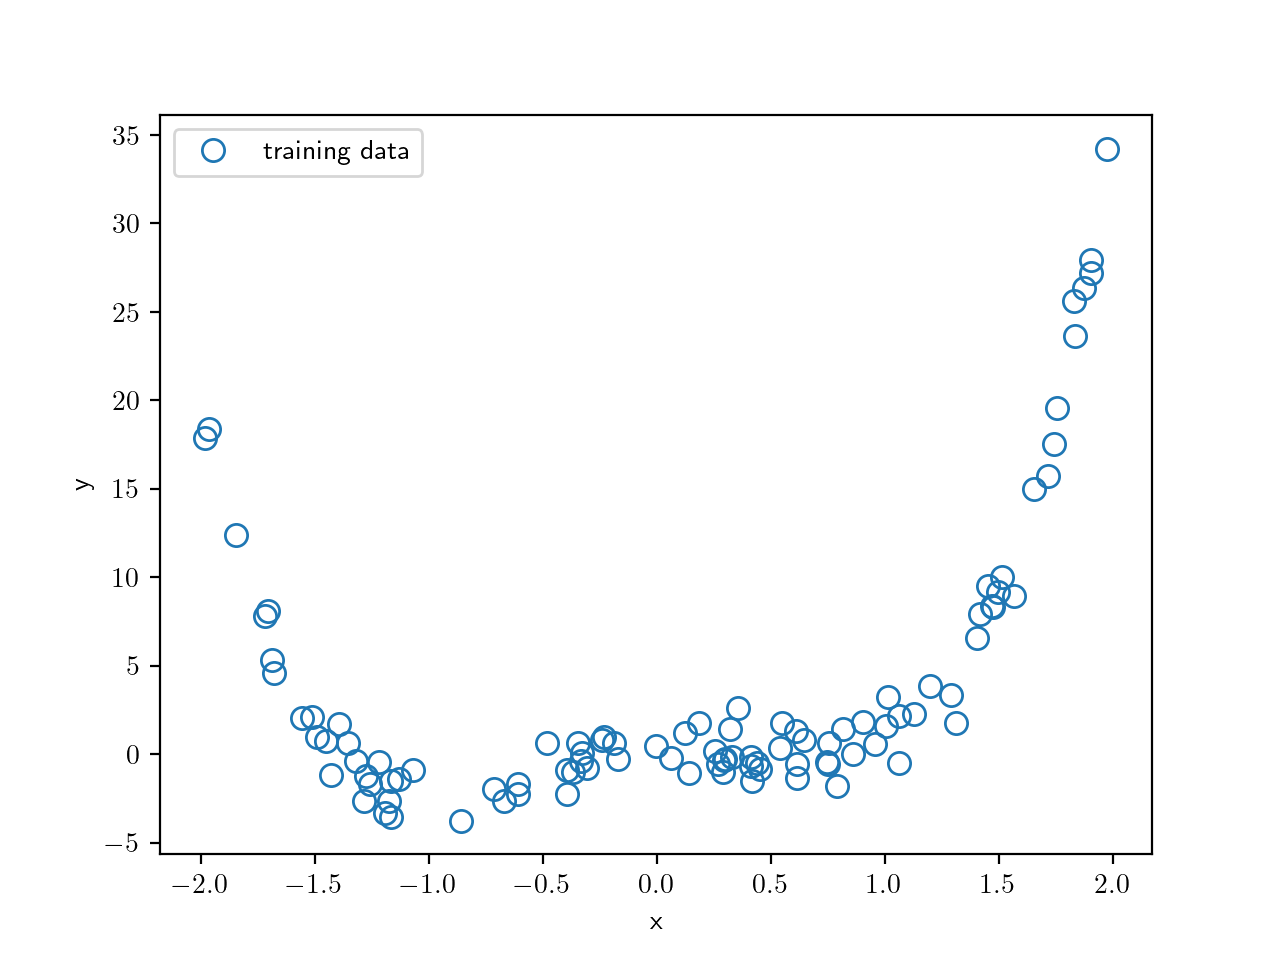

In [100]:
fig, ax = plt.subplots()

ax.plot(X, y, marker='o', lw=0, ms=8, mfc='none', color='C0', label='training data', zorder=99)

ax.legend()
ax.set(xlabel='x', ylabel='y');

In [101]:
D = 6 # grado del polinomio

X_tilde = np.vander(X.flatten(), N=D + 1, increasing=True)

In [102]:
learning_rate = 0.0005
max_steps = 10000000
tolerance = 5e-7

theta = np.random.normal(loc=0.0, scale=0.1, size=(D+1)).reshape(-1,1)

In [103]:
# Questo ciclo for potrebbe richiedere un po' di tempo!
for step in range(max_steps):
    if step % 20000 == 0: print('.', end='', flush=True)

    residual = y - X_tilde @ theta       # reminder: "@" is the matrix-vector product
    grad_of_loss = - 2 / n_records * X_tilde.T @ residual  
    theta_increment = -learning_rate * grad_of_loss
    theta += theta_increment

    if np.linalg.norm(theta_increment) < tolerance:
        print('\nFINE.\n')
        break
else:
    assert False, "massimo numero di passi raggiunti"

print("|incremento dei pesi|                   =", np.linalg.norm(theta_increment))
print("valore finale della funzione costo      =", (residual.T @ residual / n_records)[0,0])
print("numero di passi effettuati              =", step)
print("pesi ottenuti         :", theta.flatten())
print("soluzione analitica   :", (np.linalg.inv(X_tilde.T @ X_tilde) @ X_tilde.T @ y).flatten())

..................
FINE.

|incremento dei pesi|                   = 4.999989075830276e-07
valore finale della funzione costo      = 1.1628404590561814
numero di passi effettuati              = 357542
pesi ottenuti         : [ 0.1900006   1.1593063  -3.34679047  0.46226263  2.3910961   0.0556351
  0.04273267]
soluzione analitica   : [ 0.19654828  1.16189885 -3.37757739  0.4601687   2.41214637  0.0559761
  0.0391111 ]


<IPython.core.display.Javascript object>


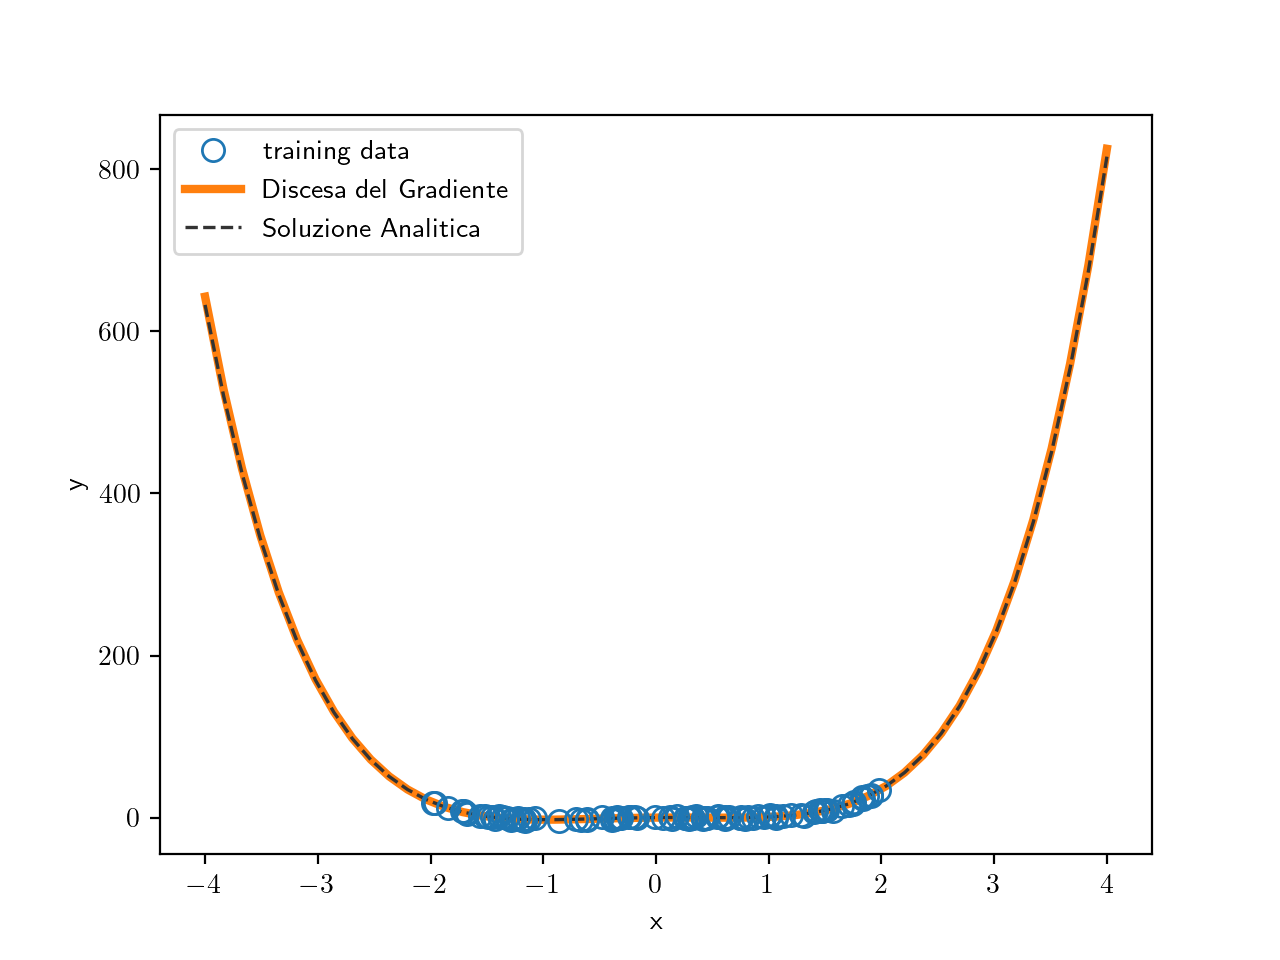

[Text(0.5, 0, 'x'), Text(0, 0.5, 'y')]

In [104]:
fig, ax = plt.subplots()

ax.plot(X, y, marker='o', lw=0, ms=8, mfc='none', color='C0', label='training data', zorder=99)

# Creiamo dei punti equispaziati sull'asse x
_x = np.linspace(-4, 4)
# Su quei punti x definiamo la matrice di Vandermonde
_IX = np.vander(_x, N=D + 1, increasing=True)

# Calcoliamo la soluzione analitica per i pesi
analytic_theta = np.linalg.inv(X_tilde.T @ X_tilde) @ X_tilde.T @ y

# Calcoliamo il nostro modello usando i theta dalla discesa del gradiente
ax.plot(_x, (_IX @ theta).flatten(), marker='', c='C1', lw=3, ls='-', label='Discesa del Gradiente')

# Calcoliamo il nostro modello usando i theta dalla soluzione analitica
ax.plot(_x, (_IX @ analytic_theta).flatten(), marker='', c='0.2', lw=1.2, ls='--', label='Soluzione Analitica')

ax.legend()
ax.set(xlabel='x', ylabel='y')#, ylim=(-2, 0.5));